## Import the relevant libraries

In [6]:
import numpy as np #mathematical operations
import matplotlib.pyplot as plt #nice graphs
from mpl_toolkits.mplot3d import Axes3D #nice 3D graphs

## Generate random input data to train on

In [8]:
observations = 1000 #contains the size of the dataset we want to generate

xs = np.random.uniform(low=-10,high=10,size=(observations,1))
zs = np.random.uniform(-10,10,size=(observations,1)) 

inputs = np.column_stack((xs,zs))

print(inputs.shape)

(1000, 2)


## Create the targets we will aim at

In [10]:
# targets = f(x,z) = 2*x - 3*z + 5 + noise
# w1 = 2, w2 = -3, b = 5
noise = np.random.uniform(-1,1,size=(observations,1)) 

targets = 2*xs - 3*zs + 5 + noise
print(targets.shape)

(1000, 1)


## Plot the training data

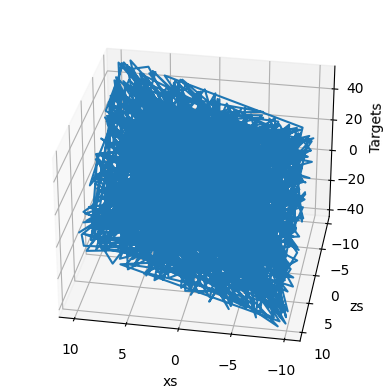

In [14]:
targets = targets.reshape(observations,1)
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.plot(xs,zs,targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
ax.view_init(azim=100)
plt.show()
targets = targets.reshape(observations,1)

### Initialize variables

In [15]:
init_range = 0.1
weights = np.random.uniform(-init_range,init_range, size = (2,1))
biases = np.random.uniform(-init_range, init_range, size = 1)

print(weights)
print(biases)

[[ 0.01938719]
 [-0.07185206]]
[-0.02111739]


### Set a learning rate

In [16]:
learning_rate = 0.02

## Train the model

In [19]:
#Game plan for each iteration:
    #Calculate outputs
    #Compare outputs to target through the loss
    #print the loss
    #Adjust weights and biases

In [26]:
for i in range(100):
    # y = xw + b
    outputs = np.dot(inputs,weights) + biases
    deltas = outputs - targets
    
    loss = np.sum(deltas ** 2) / 2 / observations
    
    print(loss)
    
    deltas_scaled = deltas / observations
    
    weights = weights - learning_rate * np.dot(inputs.T, deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)

0.17703196047814018
0.17701134184770626
0.17699153897199182
0.17697251957650773
0.17695425266367165
0.17693670846228843
0.1769198583790292
0.1769036749518307
0.1768881318051376
0.17687320360691586
0.17685886602736764
0.17684509569927762
0.17683187017993052
0.1768191679145337
0.17680696820108754
0.17679525115664574
0.17678399768490968
0.17677318944510642
0.17676280882209652
0.17675283889766516
0.1767432634229491
0.17673406679195497
0.1767252340161237
0.1767167506999034
0.17670860301728714
0.17670077768927966
0.1766932619622554
0.1766860435871725
0.17667911079961007
0.17667245230059422
0.1766660572381831
0.1766599151897809
0.17665401614515072
0.1766483504901006
0.1766429089908138
0.17663768277880035
0.17663266333644254
0.17662784248311356
0.1766232123618444
0.1766187654265191
0.1766144944295758
0.1766103924101951
0.17660645268295502
0.17660266882693532
0.17659903467525292
0.17659554430501112
0.17659219202764634
0.1765889723796572
0.17658588011370013
0.1765829101900372


### Print Weights and biases and see if we have worked correctly

In [28]:
print(weights, biases)

[[ 2.00340989]
 [-3.00496225]] [4.97189936]


### Plot last outputs vs targets
Since they are the last ones at the end of the training, they represent the final model accuracy.
The closer this plot is to a 45 degree line, the closer target and output values are.

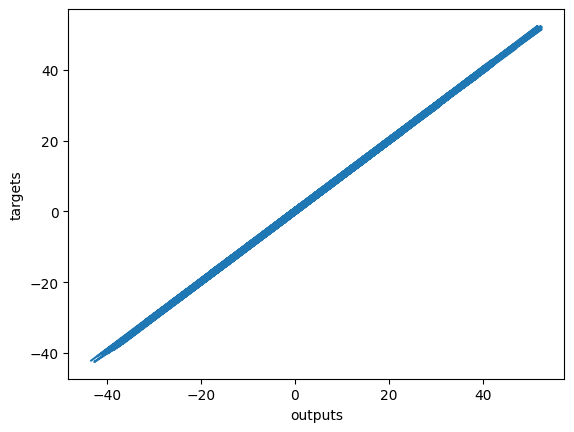

In [29]:
plt.plot(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()